<a href="https://www.kaggle.com/code/karapetmelkonyan/arm-car-values-prediction?scriptVersionId=187376750" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing libraries. 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/armenian-market-cars-prediction/Armenian Market Car Prices.csv


In [2]:
#reading CSV file
df = pd.read_csv('/kaggle/input/armenian-market-cars-prediction/Armenian Market Car Prices.csv')
print(df.head())

       Car Name  Year    Region  FuelType  Mileage  Price
0  Ford Transit  2002     Goris    Diesel   215000  12000
1    Ford Focus  2017    Ijevan  Gasoline    72000  11500
2   Opel Vectra  1998   Armavir  Gasoline   466000   4000
3       Mazda 6  2020  Nor Nork  Gasoline   100000  22000
4   Opel Vectra  1998   Armavir  Gasoline   318000   3500


In [3]:
#Checking for NA values
df.isna().sum()

Car Name    0
Year        0
Region      0
FuelType    0
Mileage     0
Price       0
dtype: int64

In [4]:
#Checking for null values
df.isnull().sum()

Car Name    0
Year        0
Region      0
FuelType    0
Mileage     0
Price       0
dtype: int64

In [5]:
#Cheking data types
df.dtypes

Car Name    object
Year         int64
Region      object
FuelType    object
Mileage      int64
Price        int64
dtype: object

In [6]:
# Calculate the current year
current_year = pd.Timestamp.now().year

# Calculate the car age
df['Car Age'] = current_year - df['Year']
# Create age bins
age_bins = [0, 3, 6, 9, 12, 15, np.inf]
age_labels = ['0-2', '3-5', '6-8', '9-11', '12-14', '15+']

# Categorize cars into age bins
df['Age Bin'] = pd.cut(df['Car Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate average price for each car model within each age bin
average_price_by_car_and_age_bin = df.groupby(['Car Name', 'Age Bin'],observed=False)['Price'].mean().reset_index()
average_price_by_car_and_age_bin.columns = ['Car Name', 'Age Bin', 'Average Price']

# Display the result
print(average_price_by_car_and_age_bin.head())

    Car Name Age Bin  Average Price
0  AIQAR eQ3     0-2        26700.0
1  AIQAR eQ3     3-5            NaN
2  AIQAR eQ3     6-8            NaN
3  AIQAR eQ3    9-11            NaN
4  AIQAR eQ3   12-14            NaN


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


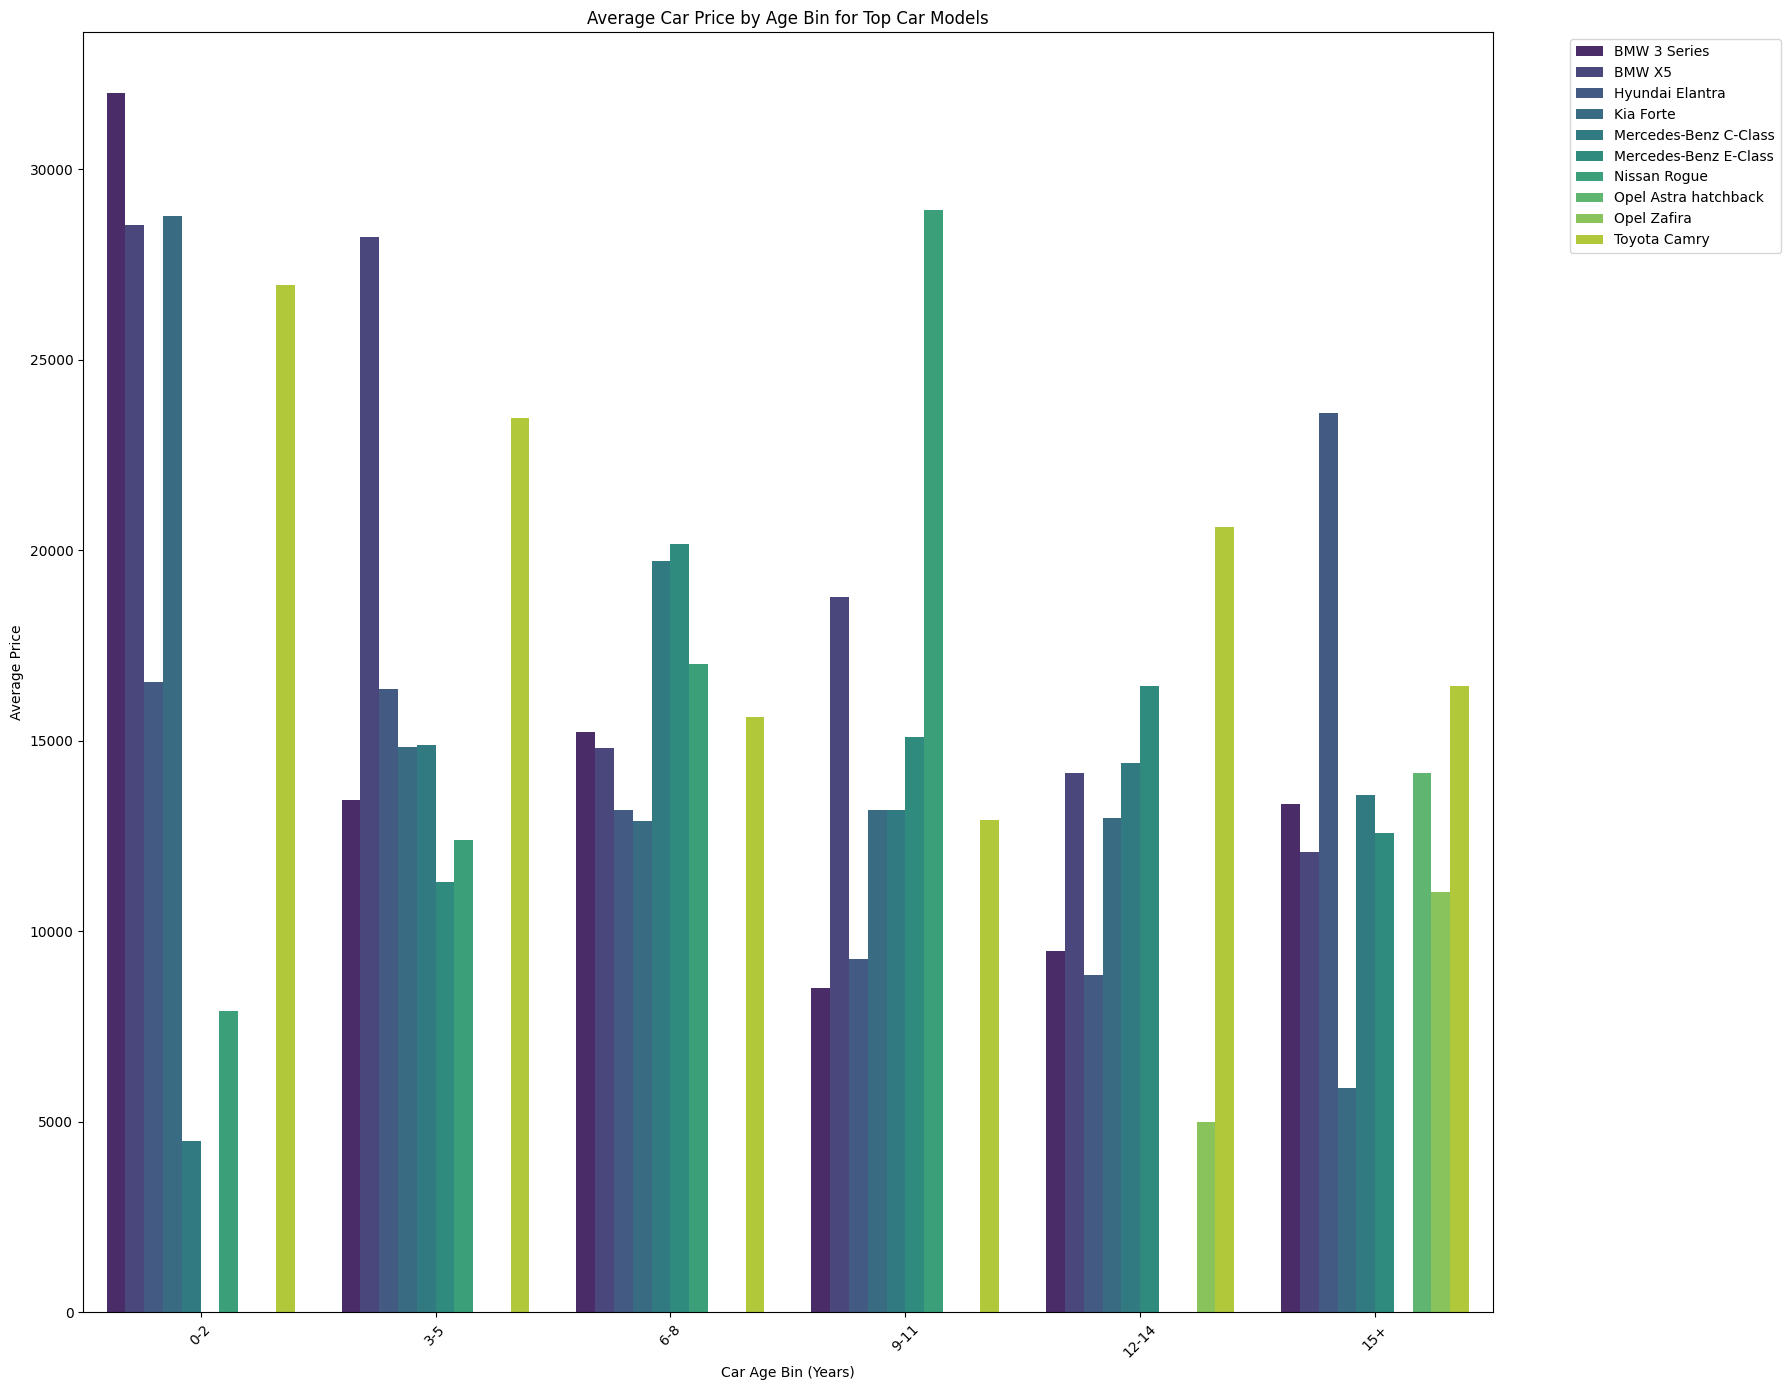

                   Car Name  Year            Region  FuelType  Mileage  Price  \
7     Mercedes-Benz E-Class  2001              Vedi  Gasoline   219779   7200   
11              Opel Zafira  2002  Malatia-Sebastia  Gasoline   197900   6300   
13    Mercedes-Benz E-Class  1996            Gyumri  Gasoline   468000   3000   
30    Mercedes-Benz C-Class  2001        On the way  Gasoline   147000   7000   
33             Toyota Camry  2020              Avan  Gasoline    98000  22500   
...                     ...   ...               ...       ...      ...    ...   
7984  Mercedes-Benz C-Class  2013           Erebuni  Gasoline   190000   4450   
7985  Mercedes-Benz C-Class  2000          Alaverdi  Gasoline   210000   4350   
7992   Opel Astra hatchback  2001          Ajapnyak  Gasoline   151000   9800   
7993           Toyota Camry  2009         Shengavit  Gasoline   300000   4500   
7994  Mercedes-Benz C-Class  1997         Nor Geghi  Gasoline   200000   3200   

      Car Age Age Bin  
7  

In [7]:

# Focus on top car models by count
top_car_counts = df['Car Name'].value_counts().head(10).index
df_top_cars = df[df['Car Name'].isin(top_car_counts)]

# Calculate average price for each car model within each age bin for top cars
average_price_by_top_cars = df_top_cars.groupby(['Car Name', 'Age Bin'], observed=False)['Price'].mean().reset_index()



# Plotting with seaborn
plt.figure(figsize=(18, 14))
sns.barplot(x='Age Bin', y='Price', hue='Car Name', data=average_price_by_top_cars, palette='viridis')
plt.title('Average Car Price by Age Bin for Top Car Models')
plt.xlabel('Car Age Bin (Years)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(df_top_cars)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
le_car_name = LabelEncoder()
le_fuel_type = LabelEncoder()
le_Region = LabelEncoder()
# Fit and transform the data
df_top_cars['Car Name Encoded'] = le_car_name.fit_transform(df_top_cars['Car Name'])
df_top_cars['FuelType Encoded'] = le_fuel_type.fit_transform(df_top_cars['FuelType'])
df_top_cars['Region Encoded'] = le_Region.fit_transform(df_top_cars['Region'])
df = df_top_cars
print(df)


                   Car Name  Year            Region  FuelType  Mileage  Price  \
7     Mercedes-Benz E-Class  2001              Vedi  Gasoline   219779   7200   
11              Opel Zafira  2002  Malatia-Sebastia  Gasoline   197900   6300   
13    Mercedes-Benz E-Class  1996            Gyumri  Gasoline   468000   3000   
30    Mercedes-Benz C-Class  2001        On the way  Gasoline   147000   7000   
33             Toyota Camry  2020              Avan  Gasoline    98000  22500   
...                     ...   ...               ...       ...      ...    ...   
7984  Mercedes-Benz C-Class  2013           Erebuni  Gasoline   190000   4450   
7985  Mercedes-Benz C-Class  2000          Alaverdi  Gasoline   210000   4350   
7992   Opel Astra hatchback  2001          Ajapnyak  Gasoline   151000   9800   
7993           Toyota Camry  2009         Shengavit  Gasoline   300000   4500   
7994  Mercedes-Benz C-Class  1997         Nor Geghi  Gasoline   200000   3200   

      Car Age Age Bin  Car 

/tmp/ipykernel_18/2313383902.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_cars['Car Name Encoded'] = le_car_name.fit_transform(df_top_cars['Car Name'])
/tmp/ipykernel_18/2313383902.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_cars['FuelType Encoded'] = le_fuel_type.fit_transform(df_top_cars['FuelType'])
/tmp/ipykernel_18/2313383902.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [9]:
# Calculate Z-scores for the "Price" column
df['Price Z-Score'] = (df['Price'] - df['Price'].mean()) / df['Price'].std()

# Display the Z-scores
print(df[['Price', 'Price Z-Score']])

# Define a Z-score threshold
z_threshold = 3

# Filter the DataFrame to remove high Z-score values
filtered_df = df[df['Price Z-Score'].abs() < z_threshold]

# Drop the 'Price Z-Score' column after filtering
filtered_df = filtered_df.drop(columns=['Price Z-Score'])

# Display the filtered DataFrame
print(filtered_df)


      Price  Price Z-Score
7      7200      -0.457672
11     6300      -0.512449
13     3000      -0.713298
30     7000      -0.469844
33    22500       0.473538
...     ...            ...
7984   4450      -0.625046
7985   4350      -0.631132
7992   9800      -0.299427
7993   4500      -0.622003
7994   3200      -0.701125

[1933 rows x 2 columns]
                   Car Name  Year            Region  FuelType  Mileage  Price  \
7     Mercedes-Benz E-Class  2001              Vedi  Gasoline   219779   7200   
11              Opel Zafira  2002  Malatia-Sebastia  Gasoline   197900   6300   
13    Mercedes-Benz E-Class  1996            Gyumri  Gasoline   468000   3000   
30    Mercedes-Benz C-Class  2001        On the way  Gasoline   147000   7000   
33             Toyota Camry  2020              Avan  Gasoline    98000  22500   
...                     ...   ...               ...       ...      ...    ...   
7984  Mercedes-Benz C-Class  2013           Erebuni  Gasoline   190000   4450   
798

In [10]:
df.to_excel('/kaggle/working/df1.xlsx')

In [11]:


# Feature selection
X = df[['Mileage', 'Car Age', 'Car Name Encoded', 'FuelType Encoded',"Region Encoded"]]
y = df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Example prediction
example_car = pd.DataFrame([{
    'Mileage': 30000,
    'Car Age': 4,
    'Car Name Encoded': 9,  # This should be a valid encoded car name
    'FuelType Encoded': 1,    # This should be a valid encoded fuel type
    'Region Encoded' : 108    # This should be a valid encoded fuel type
}])

print("\nExample Car:")
print(example_car)

# Make sure the example car's DataFrame has the same structure as X used in the model
prediction = model.predict(example_car)
print(f'Predicted Price: {prediction[0]}')

Mean Absolute Error: 9012.332166375221

Example Car:
   Mileage  Car Age  Car Name Encoded  FuelType Encoded  Region Encoded
0    30000        4                 9                 1             108
Predicted Price: 18576.57138840088


MAE is high and model need to train again based on more clear data, for example to be ecluded from data Regions "On the way" and "USA", to be noted also that data is not correct as There are car models which prices cannot be for example USD1000 for 2020 Toyota Camry. To be excluded from dataset prices for each car category with high stdv cases.